[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


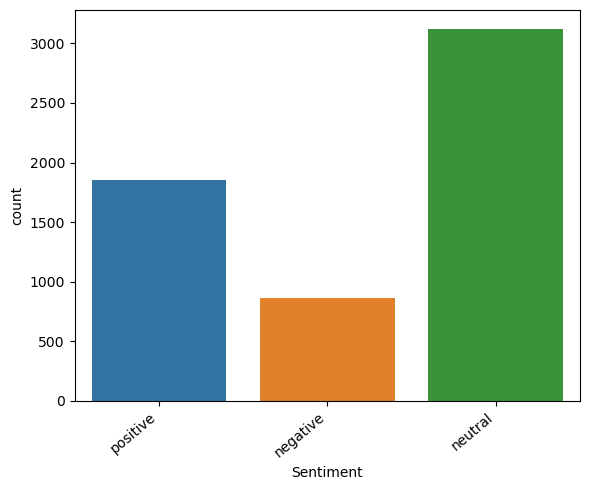

0       the geosolutions technology will leverage bene...
1       $esi on lows, down $1.50 to $2.50 bk a real po...
2       for the last quarter of 2010 , componenta 's n...
3       according to the finnish-russian chamber of co...
4       the swedish buyout firm has sold its remaining...
                              ...                        
5837    rising costs have forced packaging producer hu...
5838    nordic walking was first used as a summer trai...
5839    according shipping company viking line , the e...
5840    in the building and home improvement trade , s...
5841    helsinki afx - kci konecranes said it has won ...
Name: Sentence, Length: 5836, dtype: object


In [1]:
#importing libraries

import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer

df = pd.read_csv('C:/ML/python/data/data.csv',delimiter=',')

df.info()
df.isna().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

df['Sentiment'].value_counts()

df['class'] = df['Sentiment'].map({'negative':0,'positive':1,'neutral':2})


fig, axs = plt.subplots(figsize=(6,5)) 
sns.countplot(x='Sentiment',data=df,ax=axs)
axs.set_xticklabels(axs.get_xticklabels(),rotation=40,ha="right")
plt.tight_layout()
plt.show()

df['Sentence'] = df['Sentence'].str.lower()
print(df['Sentence'])


In [2]:
#removing html tags
def remove_html_tags(text):
    pattern = r'<.*?>' 
    text = re.sub(pattern, '', text)
    return text

df['Sentence'] = df['Sentence'].apply(remove_html_tags)

print(df['Sentence'])

0       the geosolutions technology will leverage bene...
1       $esi on lows, down $1.50 to $2.50 bk a real po...
2       for the last quarter of 2010 , componenta 's n...
3       according to the finnish-russian chamber of co...
4       the swedish buyout firm has sold its remaining...
                              ...                        
5837    rising costs have forced packaging producer hu...
5838    nordic walking was first used as a summer trai...
5839    according shipping company viking line , the e...
5840    in the building and home improvement trade , s...
5841    helsinki afx - kci konecranes said it has won ...
Name: Sentence, Length: 5836, dtype: object


In [3]:
# removing url tags
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)


df['Sentence'] = df['Sentence'].apply(remove_url)

print(df['Sentence'])

0       the geosolutions technology will leverage bene...
1       $esi on lows, down $1.50 to $2.50 bk a real po...
2       for the last quarter of 2010 , componenta 's n...
3       according to the finnish-russian chamber of co...
4       the swedish buyout firm has sold its remaining...
                              ...                        
5837    rising costs have forced packaging producer hu...
5838    nordic walking was first used as a summer trai...
5839    according shipping company viking line , the e...
5840    in the building and home improvement trade , s...
5841    helsinki afx - kci konecranes said it has won ...
Name: Sentence, Length: 5836, dtype: object


In [4]:
#removing punctuations
import string
PUNC = string.punctuation


def remove_punctuations(text):
    return text.translate(str.maketrans("","",PUNC))

df['Sentence'] = df['Sentence'].apply(remove_punctuations)

print(df['Sentence'])


0       the geosolutions technology will leverage bene...
1       esi on lows down 150 to 250 bk a real possibility
2       for the last quarter of 2010  componenta s net...
3       according to the finnishrussian chamber of com...
4       the swedish buyout firm has sold its remaining...
                              ...                        
5837    rising costs have forced packaging producer hu...
5838    nordic walking was first used as a summer trai...
5839    according shipping company viking line  the eu...
5840    in the building and home improvement trade  sa...
5841    helsinki afx  kci konecranes said it has won a...
Name: Sentence, Length: 5836, dtype: object


In [5]:
#removing stopwords

df['Sentence'] = df['Sentence'].str.replace("\d","")
df['Sentence'] = df['Sentence'].str.replace("[^\w\s]","")
df['Sentence'] = df['Sentence'].str.replace("mn","")

sw = set(stopwords.words("english"))


def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in sw]
    return ' '.join(filtered_tokens)

df['Sentence'] = df['Sentence'].apply(remove_stopwords)
print(df['Sentence'])

0       geosolutions technology leverage benefon gps s...
1                            esi lows bk real possibility
2       last quarter componenta net sales doubled eurm...
3       according finnishrussian chamber commerce majo...
4       swedish buyout firm sold remaining percent sta...
                              ...                        
5837    rising costs forced packaging producer huhtama...
5838    nordic walking first used summer training meth...
5839    according shipping company viking line eu deci...
5840    building home improvement trade sales decrease...
5841    helsinki afx kci konecranes said order four ho...
Name: Sentence, Length: 5836, dtype: object


In [6]:
#applying lemming over stemming

lemma = WordNetLemmatizer()

def lemm_text(text):
    tokens = word_tokenize(text)
    lemma_tokens = [lemma.lemmatize(token) for token in tokens]
    return " ".join(lemma_tokens)

df['Sentence'] = df['Sentence'].apply(lemm_text)


In [7]:
#using a textblob to see sentences and tags
text_ = " ".join(word for word in df["Sentence"])

blob = TextBlob(text_)

print(blob.sentences)
print(blob.tags)


[Sentence("geosolutions technology leverage benefon gps solution providing location based search technology community platform location relevant multimedia content new powerful commercial model esi low bk real possibility last quarter componenta net sale doubled eurm eurm period year earlier moved zero pretax profit pretax loss eurm according finnishrussian chamber commerce major construction company finland operating russia swedish buyout firm sold remaining percent stake almost eighteen month taking company public finland spy wouldnt surprised see green close shell billion bg deal meet shareholder skepticism ssh communication security corp stock exchange release october pm company update full year outlook estimate result remain loss full year kone net sale rose yearonyear first nine month stockmann department store total floor space square metre stockmann investment project price tag eur million circulation revenue increased finland sweden sap q disappoints software license real prob

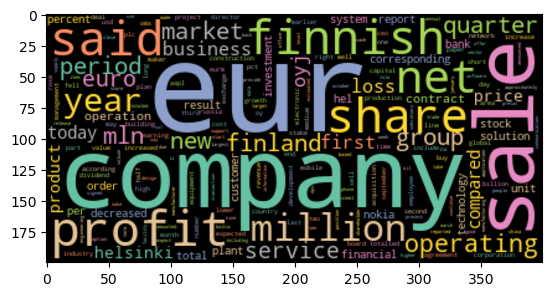

In [8]:
#wordcloud of most frequent words
wordcloud = WordCloud(colormap='Set2',collocations=False).generate(text_)
plt.imshow(wordcloud,interpolation='mitchell')
plt.show()


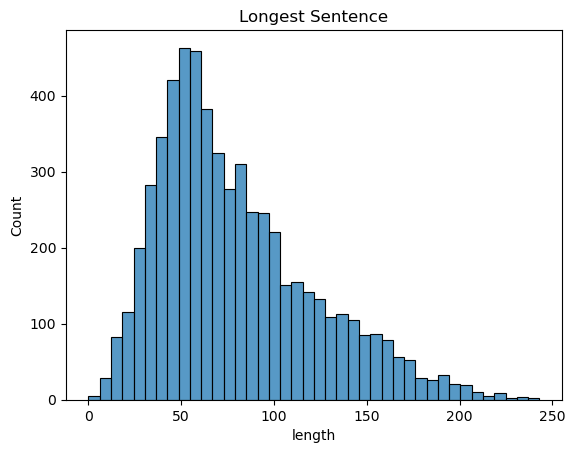

In [9]:
#histogram of length for no reason at all
df['length'] = df['Sentence'].apply(len)


sns.histplot(x='length',data=df)
plt.title('Longest Sentence')
plt.show()



In [10]:
#three naive bayes models, logistic regression and Passive Agressive classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


X = df['Sentence']
X = cv.fit_transform(X).toarray()
y = df['Sentiment']
y = le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)



from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

BNB = BernoulliNB()
GNB = GaussianNB()
MNB = MultinomialNB()

from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier

lr = LogisticRegression()
PA = PassiveAggressiveClassifier()

from sklearn.metrics import accuracy_score,classification_report

def evaluate_naive_bayes(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test, pred)
    print(f'{model.__class__.__name__}, --Accuracy-- {acc*100:.2f}%; --Clf_rpt-- {clf_rpt}')
    return pred


BNB_pred = evaluate_naive_bayes(X_train, X_test, y_train, y_test,BNB)
GNB_pred = evaluate_naive_bayes(X_train, X_test, y_train, y_test, GNB)
MNB_pred = evaluate_naive_bayes(X_train, X_test, y_train, y_test, MNB)
lr_pred = evaluate_naive_bayes(X_train, X_test, y_train, y_test, lr)
PA_pred = evaluate_naive_bayes(X_train, X_test, y_train, y_test, PA)

BernoulliNB, --Accuracy-- 70.46%; --Clf_rpt--               precision    recall  f1-score   support

           0       0.23      0.05      0.08       159
           1       0.74      0.88      0.80       666
           2       0.68      0.66      0.67       343

    accuracy                           0.70      1168
   macro avg       0.55      0.53      0.52      1168
weighted avg       0.65      0.70      0.67      1168

GaussianNB, --Accuracy-- 49.14%; --Clf_rpt--               precision    recall  f1-score   support

           0       0.19      0.42      0.26       159
           1       0.74      0.49      0.59       666
           2       0.47      0.52      0.50       343

    accuracy                           0.49      1168
   macro avg       0.47      0.48      0.45      1168
weighted avg       0.58      0.49      0.52      1168

MultinomialNB, --Accuracy-- 68.07%; --Clf_rpt--               precision    recall  f1-score   support

           0       0.32      0.33      0.33 

<Axes: title={'center': 'Confusion Matrix for BernoulliNB'}>

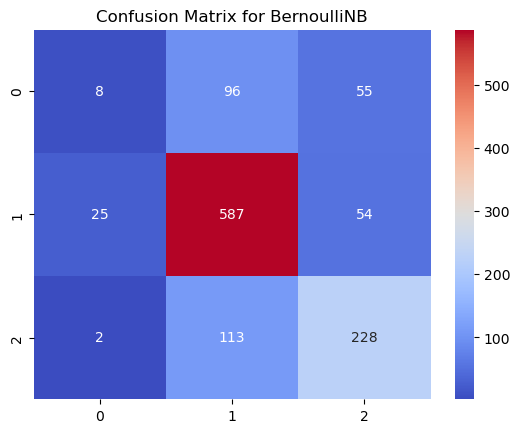

In [11]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_plot(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    con = confusion_matrix(y_test,pred)
    heatmap = sns.heatmap(con,annot=True,fmt="d",cmap="coolwarm")
    heatmap.set_title(f'Confusion Matrix for {model.__class__.__name__}')
    return heatmap

confusion_matrix_plot(X_train, X_test, y_train, y_test, BNB)

<Axes: title={'center': 'Confusion Matrix for GaussianNB'}>

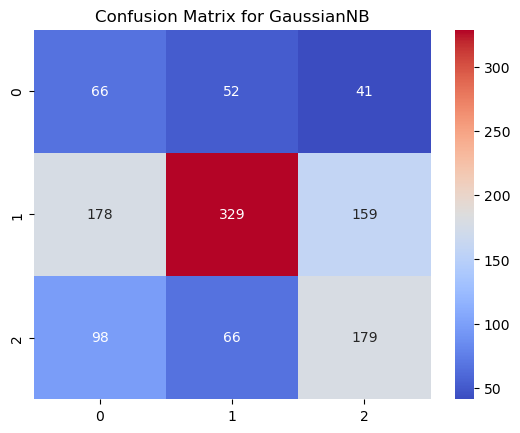

In [12]:
confusion_matrix_plot(X_train, X_test, y_train, y_test, GNB)

<Axes: title={'center': 'Confusion Matrix for MultinomialNB'}>

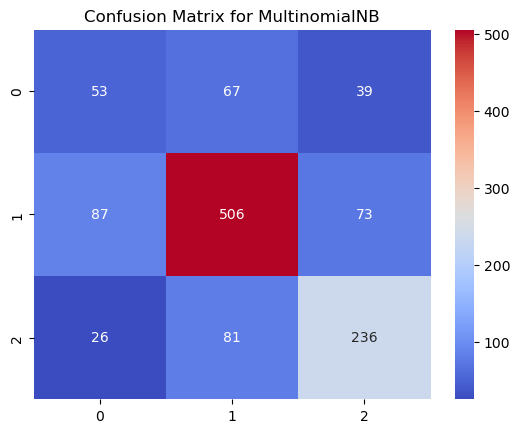

In [13]:
confusion_matrix_plot(X_train, X_test, y_train, y_test,MNB)

<Axes: title={'center': 'Confusion Matrix for LogisticRegression'}>

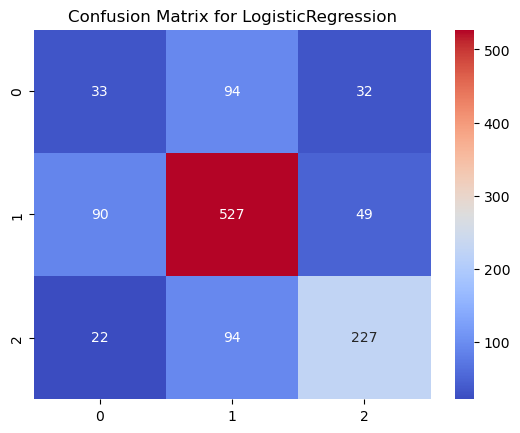

In [14]:
confusion_matrix_plot(X_train, X_test, y_train, y_test, lr)

<Axes: title={'center': 'Confusion Matrix for PassiveAggressiveClassifier'}>

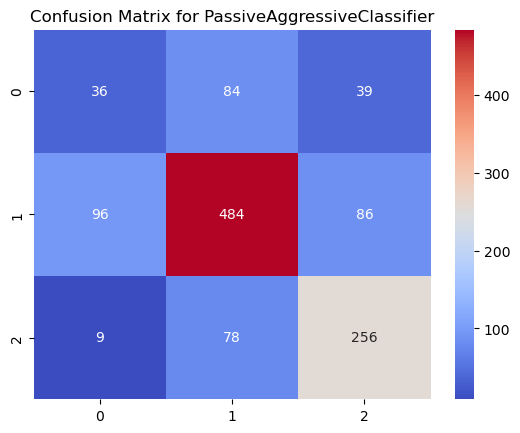

In [15]:
confusion_matrix_plot(X_train, X_test, y_train, y_test, PA)

In [ ]:
#this is garbage